In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [10]:

# Load the dataset

df = pd.read_csv( r'C:\Users\user\Desktop\Data Science\Repository\Maxis Stock & Share\Maxis_Stock_Price (19.7.24).csv')



In [11]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [28]:
# Select the 'Close' prices for prediction
data = df[['Close']]

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(data)



In [29]:
# Create sequences of past stock prices (e.g., use the past 60 days to predict the next day)
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length+1])
    return np.array(sequences)

sequence_length = 5
sequences = create_sequences(scaled_prices, sequence_length)



In [30]:
# Separate the features (X) and targets (y)
X = sequences[:-1]
y = scaled_prices[sequence_length:]


In [31]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [32]:
# Reshape the data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [33]:
# Define the modified LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.3931 - val_loss: 0.0043
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.3630 - val_loss: 0.0031
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3406 - val_loss: 0.0024
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.3098 - val_loss: 0.0023
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.2899 - val_loss: 0.0030
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.2622 - val_loss: 0.0047
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.2295 - val_loss: 0.0076
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.2041 - val_loss: 0.0124
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1696 - val_loss: 0.0195
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1435 - val_loss: 0.0298
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.1170 - val_loss: 0.0446
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0895 - val

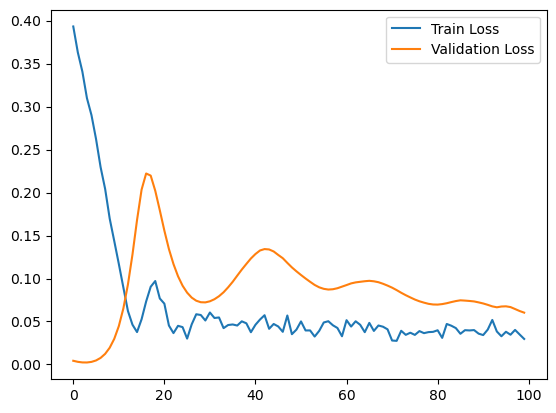

In [38]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

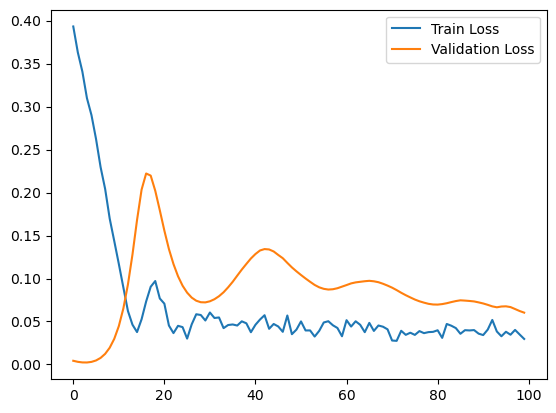

In [39]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [41]:
# Predict the stock prices on the test data
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


In [42]:
# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

ValueError: x and y must have same first dimension, but have shapes (6,) and (5, 1)

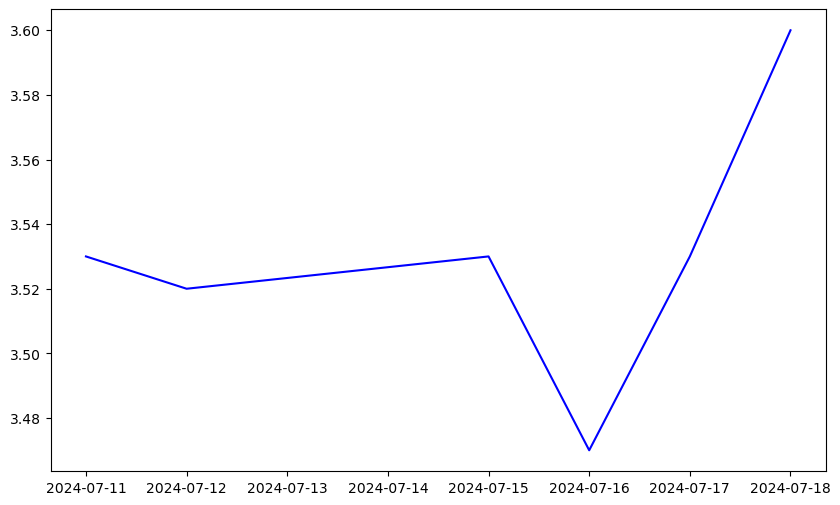

In [43]:
# Plot the predicted prices against the actual prices
plt.figure(figsize=(10,6))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='Actual Stock Price')
plt.plot(data.index[-len(y_test):], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6,) and (5, 1)

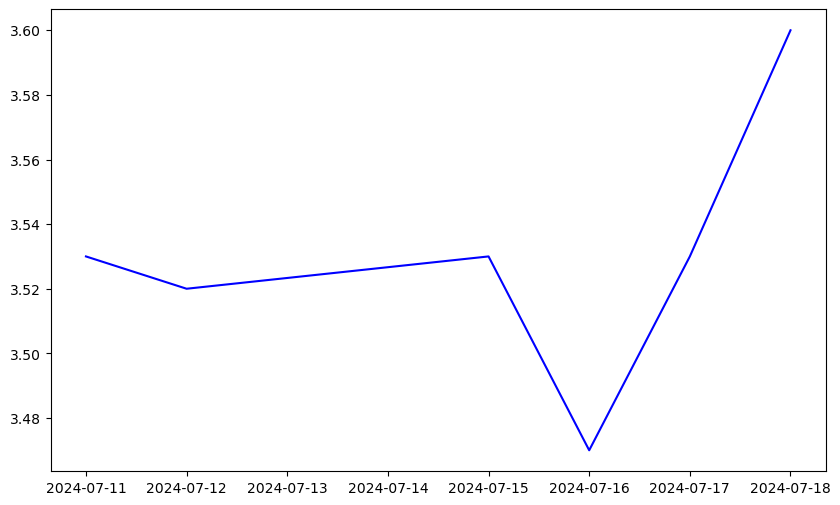